This notebook implements the Hybrid-Opinion-Model by Jager et. al. 
[Jager et al. (2004). Uniformity, Bipolarization and Pluriformity Captured as Generic Stylized Behavior with an Agent-Based Simulation Model of Attitude Change]

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def Opinion_Dynamics(N, mu, u, t, runtime, filename, seed=42):
    # Create array to save the dynmaics
    saves = np.zeros((runtime, N))

    # Set seed
    np.random.seed(seed)

    # Create array representing agents opinions and assign them uniformly distributed
    # random opinions from -1 to 1
    agents = np.zeros(N)
    for i in range (N):
        agents[i] = np.random.uniform(-1.0, 1.0)

    # Create index array to later access agents in random order
    inds = np.arange(0, N, 1, dtype = int)

    # Start dynamics
    time = 0
    while time < runtime:
        # Determine random order in which agents are visited
        order = np.random.choice( inds, size=N, replace=False)
        # Create array that saves old opinions
        #agents = agents

        for a in order:
            # Pick random partner != a
            par = a
            while par == a:
                par = np.random.choice( inds, size=1)

            # Perform dynamics 
            if abs(agents[a] - agents[par]) <= u:
                agents[a] = agents[a] + mu * (agents[par] - agents[a])
                agents[par] = agents[par] + mu * (agents[a] - agents[par])
            if abs(agents[a] - agents[par]) >= t:
                agents[a] = agents[a] - mu * (agents[par] - agents[a])
                agents[par] = agents[par] - mu * (agents[a] - agents[par])
                
            # Truncate opinions to avoid them going beyond the opinion borders [-1,1]
            if agents[a] > 1:
                agents[a] = 1
            if agents[par] > 1:
                agents[par] = 1
            if agents[a] < -1:
                agents[a] = -1
            if agents[par] < -1:
                agents[par] = -1

        # Save new opinions
        saves[time] = agents

        time += 1
    
    # Export saves to csv
    pd.DataFrame(saves).to_csv(f"D:\Daten mit Änderungen\Physik\Epidemics_Infodemics_Mobility\Data_repl\{filename}.csv")

    return saves


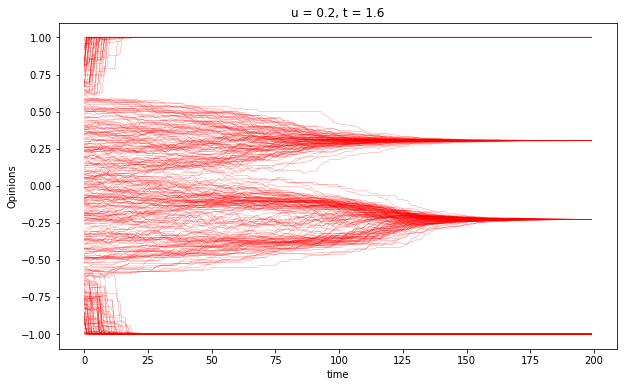

In [28]:
# Set parameters
N = 400
mu = 0.1
u = 0.2
t = 1.6
runtime = 200

# Perform simulation
data = Opinion_Dynamics(N, mu, u, t, runtime, "HB_u0.2_t1.6_test", seed=40)

# Example plot of latest dataset.
time = np.arange(0, runtime)

plt.figure(figsize=(10,6))
plt.xlabel("time")
plt.ylabel("Opinions")
for i in range (N):
    plt.plot(time, data[:,i], color='r', linewidth = '0.2')
plt.title(f"u = 0.2, t = 1.6")
plt.ylim(-1.1,1.1)
plt.savefig("D:\Daten mit Änderungen\Physik\Epidemics_Infodemics_Mobility\HB_u0.2_t1.6.png")